Trayectoria individual

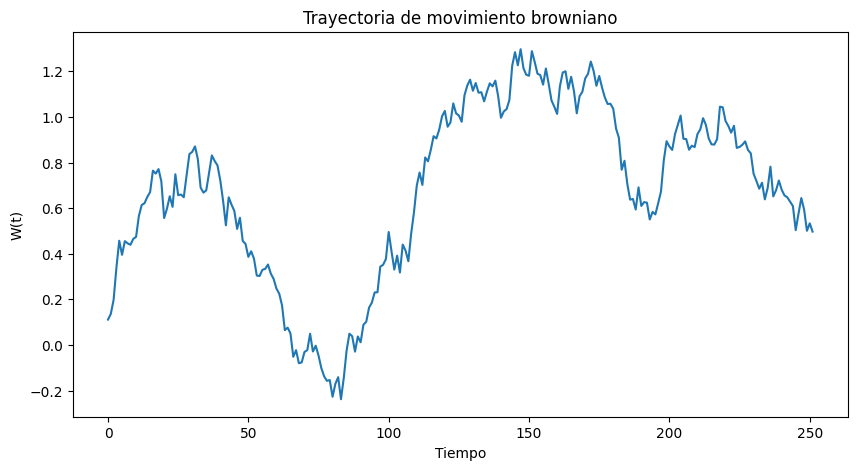

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

T = 1
n = 252
dt = T/n

increments = np.random.normal(0, np.sqrt(dt), size=n)
W = np.cumsum(increments)

plt.figure(figsize=(10,5))
plt.plot(W)
plt.title("Trayectoria de movimiento browniano")
plt.xlabel("Tiempo")
plt.ylabel("W(t)")
plt.show()

Múltiples trayectorias

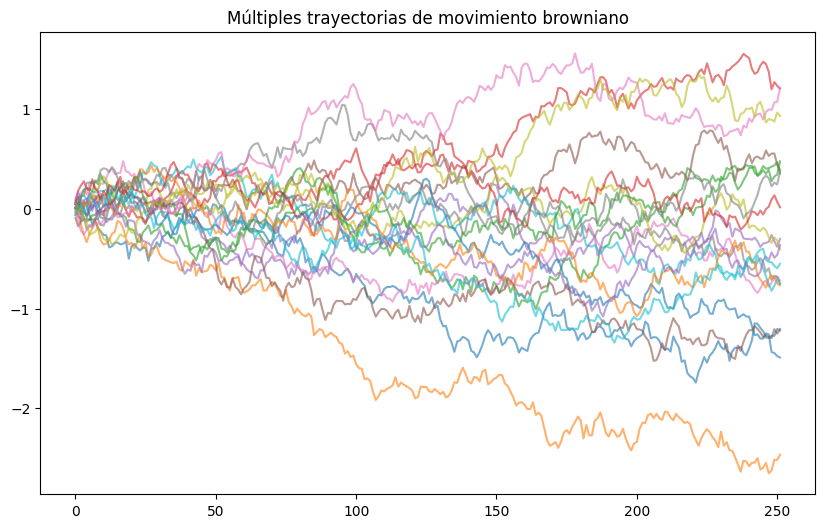

In [3]:
plt.figure(figsize=(10,6))

for _ in range(20):
    increments = np.random.normal(0, np.sqrt(dt), size=n)
    W = np.cumsum(increments)
    plt.plot(W, alpha=0.6)

plt.title("Múltiples trayectorias de movimiento browniano")
plt.show()

Distribución en un tiempo fijo

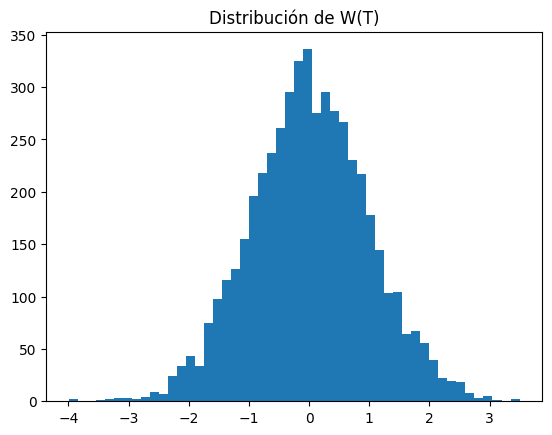

In [5]:
n_sim = 5000
final_values = []

for _ in range(n_sim):
    increments = np.random.normal(0, np.sqrt(dt), size=n)
    final_values.append(np.sum(increments))

plt.hist(final_values, bins=50)
plt.title("Distribución de W(T)")
plt.show()

###**Actividad — Escalamiento de la incertidumbre en el movimiento browniano**

**Objetivo**

Analizar empíricamente cómo crece la incertidumbre en un movimiento browniano conforme aumenta el horizonte temporal y relacionarlo con el concepto de volatilidad en finanzas.

Al finalizar la actividad se espera que el estudiante comprenda que:

La media del movimiento browniano permanece constante en cero.
La varianza crece proporcionalmente al tiempo.
La desviación estándar crece con la raíz del tiempo.
El riesgo de un sistema aleatorio aumenta con el horizonte temporal.
Instrucciones generales

El objetivo de la actividad es construir desde cero una simulación de movimiento browniano y analizar cómo cambia su distribución final cuando se modifica el horizonte temporal.

No se proporciona código base. Cada estudiante debe implementar la simulación utilizando Python.

Se permite utilizar únicamente las librerías:

numpy
matplotlib


**Parte 1 — Simulación del proceso**

Simular trayectorias de movimiento browniano estándar.

Utilizar al menos 5,000 simulaciones independientes.

Trabajar con los siguientes horizontes temporales:

T = 0.25
T = 0.5
T = 1
T = 2
Para cada horizonte temporal:

Discretizar el intervalo usando 252 pasos.
Generar incrementos normales con media cero.
Asegurar que la varianza escale correctamente con el tamaño del paso.
Calcular el valor final del proceso en el tiempo T.
El resultado debe ser un conjunto de valores finales para cada horizonte.

**Parte 2 — Visualización**

Construir una gráfica que muestre, en una misma figura:

La distribución final del proceso para cada horizonte temporal.
Utilizar histogramas superpuestos.
Incluir leyenda y títulos adecuados.
La visualización debe permitir comparar claramente la dispersión de cada caso.

**Parte 3 — Análisis cuantitativo**

Para cada horizonte temporal calcular:

Media empírica
Varianza empírica
Desviación estándar empírica
Presentar los resultados en una tabla.



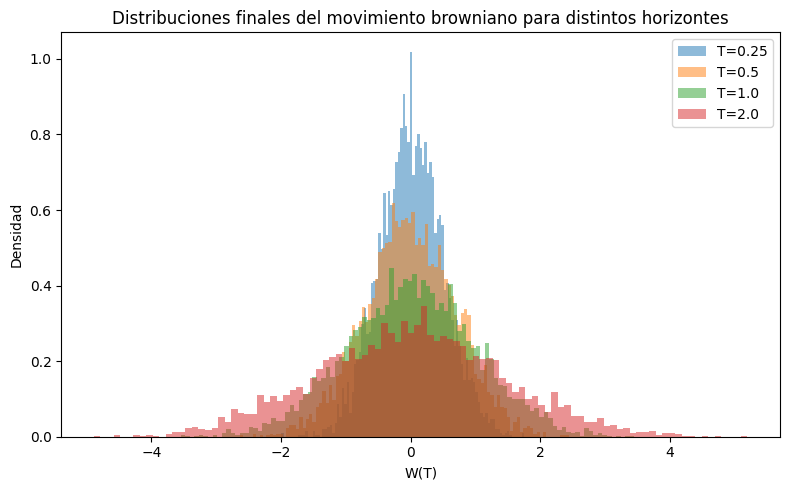

T          mean          var            std
0.25          0.00934          0.24074          0.49065
0.5          -0.00687          0.49272          0.70194
1.0          0.01016          0.9929          0.99644
2.0          -0.01113          2.04009          1.42832


In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

Ts = np.array([0.25,0.5,1,2])
n = 252
n_sim = 5000

final_vals = {}
stats = {}

plt.figure(figsize=(8,5))
bins = 100

for T in Ts:
    dt = T / n
    increments = np.random.normal(loc=0.0, scale=np.sqrt(dt), size=(n_sim, n))
    W_T = increments.sum(axis=1)
    final_vals[T] = W_T
    stats[T] = {'mean': W_T.mean(), 'var': W_T.var(), 'std': W_T.std()}
    plt.hist(W_T, bins=bins, density=True, alpha=0.5, label=f"T={T}")

plt.title("Distribuciones finales del movimiento browniano para distintos horizontes")
plt.xlabel("W(T)")
plt.ylabel("Densidad")
plt.legend()
plt.tight_layout()
plt.show()

print("T" + " "*10 + "mean" + " "*10 + "var" + " "*12 + "std")
for T in Ts:
    s = stats[T]
    print(str(T) + " "*10 + str(round(s['mean'], 5)) + " "*10 + str(round(s['var'], 5)) + " "*10 + str(round(s['std'], 5)))

##**Parte 4 — Preguntas de análisis**

Responder de forma breve y precisa:

**1.¿Cómo cambia la dispersión de la distribución al aumentar el horizonte temporal?** La dispersión aumenta conforme vaya aumentando el horizonte temporal, entre más tiempo, más dispersión.

**¿La media del proceso depende del tiempo?** La media del proceso no depende del tiempo, la media se mantiene aproximadamente constante y cercana a 0.

**¿Qué relación observas entre la varianza y el tiempo?** Se puede observar que la varianza y el tiempo crecen de manera proporcial.

**Si el horizonte temporal se cuadruplica, ¿qué ocurre aproximadamente con la desviación estándar?** se cuadruplica

**¿Qué implicaciones tiene este comportamiento para el riesgo financiero a distintos horizontes?** A mayor horizonte, mayor incertidumbre y por ende, mayor riesgo.